# Inteligencia Artificial: Aprendizaje Automático (2024)

## María Paola Galvis y Luis Gil

## **1. Cargue desde M7 y grafique el conjunto de datos ”Sunspot Number”.**

Para graficar el conjunto de datos Sunspot Number contamos con 3 archivos .csv, donde el primero contiene data acerca de la aparición de manchas solares de forma diaria, contando desde el año 1818; los otros dos archivos contienen información mensual acerca de la aparición de manchas solares desde 1749, uno de forma más precisa (azul) pero el otro con un tono más suavizado (rojo).

Para la graficación de los datos, se tomaron los años más recientes (de 2012 para acá) para apreciar el comportamiento de las graficas. Se tomaron estos años imitando la [fuente original de esta data](https://www.sidc.be/SILSO/home)



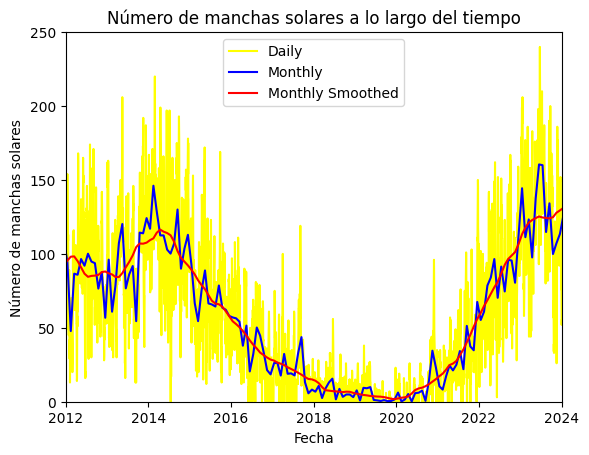

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.api.layers import SimpleRNN, Dense, LSTM
from keras.src.models import Sequential
from keras.src.optimizers import SGD
import numpy as np
from sklearn.preprocessing import MinMaxScaler

daily_data = pd.read_csv('./SN_d_tot_V2.0.csv', delimiter=";", header=0)
monthly_data = pd.read_csv('./SN_m_tot_V2.0.csv', delimiter=";", header=0)
monthly_smoothed_data = pd.read_csv('./SN_ms_tot_V2.0.csv', delimiter=";", header=0)

daily_df = daily_data[['DecimalYear', 'SN']]
daily_df = daily_df[daily_df["SN"] != -1]

monthly_df = monthly_data[['DecimalYear', 'SN']]
monthly_df = monthly_df[monthly_df["SN"] != -1]

monthly_smoothed_df = monthly_smoothed_data[['DecimalYear', 'SN']]
monthly_smoothed_df = monthly_smoothed_df[monthly_smoothed_df["SN"] != -1]

# #Graficamos los datos
sns.lineplot(data=daily_df, x='DecimalYear', y='SN', label="Daily", color='yellow')
sns.lineplot(data=monthly_df, x='DecimalYear', y='SN', label="Monthly", color='blue')
sns.lineplot(data=monthly_smoothed_df, x='DecimalYear', y='SN', label="Monthly Smoothed", color='red')

plt.xlim(2012, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()
plt.show()

## **2. Divida la data en dos conjuntos: uno de entrenamiento y uno de validación. Considere como data de validación los ultimos 10 años de datos**

Para dividir la data en entrenamiento y prueba, simplemente tomamos los datos que tenemos, y, a partir del año en formato decimal, tomamos del 2014 para abajo los datos de entrenamiento y los de prueba del 2014 hasta el más reciente.

Para trabajar los datos en una RNN debemos agrupar los datos de acuerdo a la cantidad de momentos que se van a tomar en cuenta para cada iteración, por lo tanto tenemos que agrupar las SALIDAS originales que serán nuestras entradas en el modelo de la RNN

In [92]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_df = daily_df[daily_df['DecimalYear'] < 2014]
test_df = daily_df[daily_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

# Preparar los datos para la RNN
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 1])  # Usar la columna 'SN' para las secuencias
        Y.append(data[i + time_step, 1])
    return np.array(X), np.array(Y)

time_step = 1
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## **3. Prediga el número de manchas solares en el conjunto de validación usando:**
  - Una red neuronal recurrente con neuronas recurrentes simples de Keras.
  - Una red neuronal recurrente con neuronas LSTM de Keras.

Para el primer caso, veremos como influye en la red neuronal la cantidad de pasos en el tiempo que asignemos (el unfold), así como la cantidad de neuronas recurrentes que tengamos en la misma

#### **1. Primer caso: Una neurona con un solo paso en el tiempo**

En este caso, estaremos evaluando una única neurona tomando únicamente un momento en el tiempo, lo que hace que su capacidad de retención sea literalmente nula, ya que esta nisiquiera toma en cuenta el paso anterior, teniendo así únicamente un perceptrón simple.

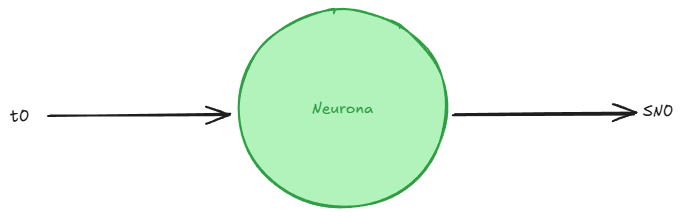

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_25 (SimpleRNN)       │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - loss: 0.0198
Epoch 2/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - loss: 0.0037
Epoch 3/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - loss: 0.0019
Epoch 4/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - loss: 0.0019
Epoch 5/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - loss: 0.0019
Epoch 6/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - loss: 0.0019
Epoch 7/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: 0.0019
Epoch 8/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - loss: 0.0019
Epoch 9/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 0.0019
Epoch 10/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - loss: 0.0019
Epoch 11/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - loss: 0.0019
Epoch 12/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 0.0019
Epoch 13/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - loss: 0.0019
Epoch 14/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 0.0019
E

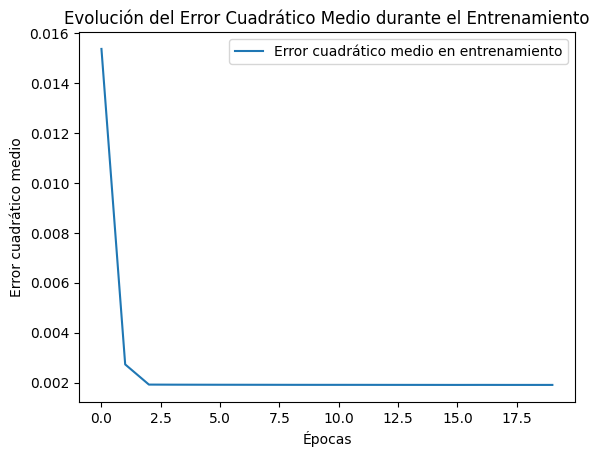

In [96]:
from keras.api.layers import SimpleRNN, Dense
from keras.src.models import Sequential

input_shape = (1, 1)

model = Sequential()
model.add(SimpleRNN(1, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

#### **Probando el modelo:**

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 6.7918e-04
Pérdida: 0.0005929630715399981
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


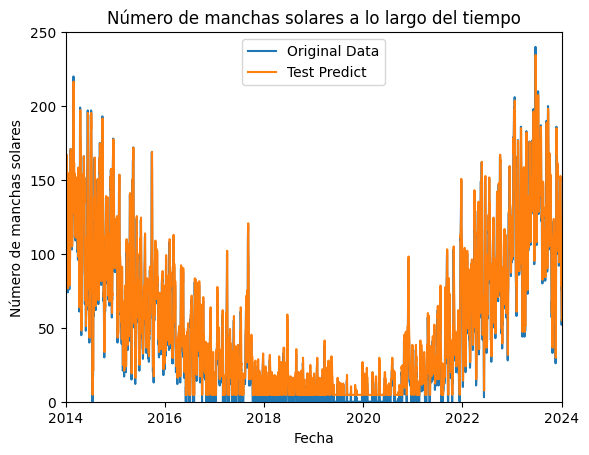

In [97]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(daily_df['DecimalYear'], daily_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()
plt.show()

#### **Probando una neurona recordando 10 pasos en el tiempo**

En este caso, estaremos evaluando una única neurona tomando 10 momentos en el tiempo, consiguiendo que la neurona tenga retención en el tiempo hasta de lo que pasó en los 10 momentos anteriores.

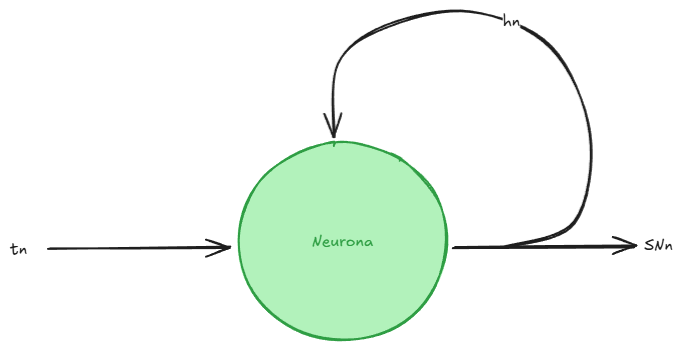

De "abrir" la neurona (hacer el unfold) tendríamos la siguiente red:

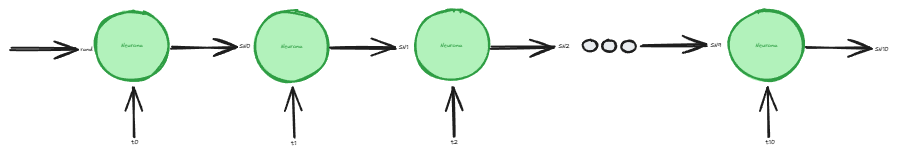

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)       │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - loss: 0.0046
Epoch 2/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - loss: 0.0020
Epoch 3/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 0.0020
Epoch 4/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.0019
Epoch 5/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 0.0019
Epoch 6/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 0.0019
Epoch 7/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - loss: 0.0019
Epoch 8/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 0.0019
Epoch 9/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.0019
Epoch 10/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 0.0019
Epoch 11/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 0.0020
Epoch 12/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 0.0019
Epoch 13/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - loss: 0.0020
Epoch 14/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 0.0019
E

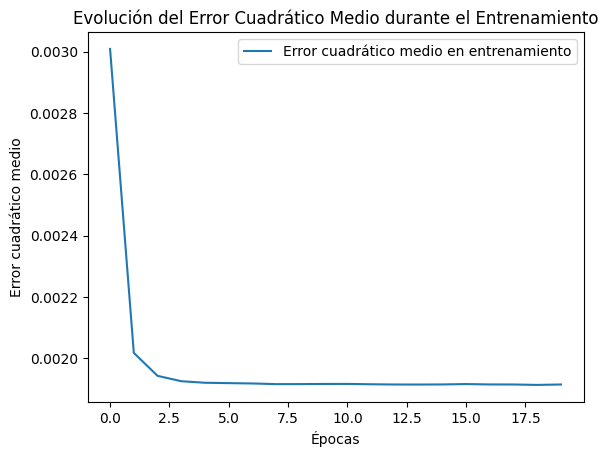

In [98]:
from keras.api.layers import SimpleRNN, Dense
from keras.src.models import Sequential

# Dividir los datos en conjunto de entrenamiento y prueba
train_df = daily_df[daily_df['DecimalYear'] < 2014]
test_df = daily_df[daily_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = (10, 1)

model = Sequential()
model.add(SimpleRNN(1, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

## **Probando la red:**

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 6.7405e-04
Pérdida: 0.0005875799688510597
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


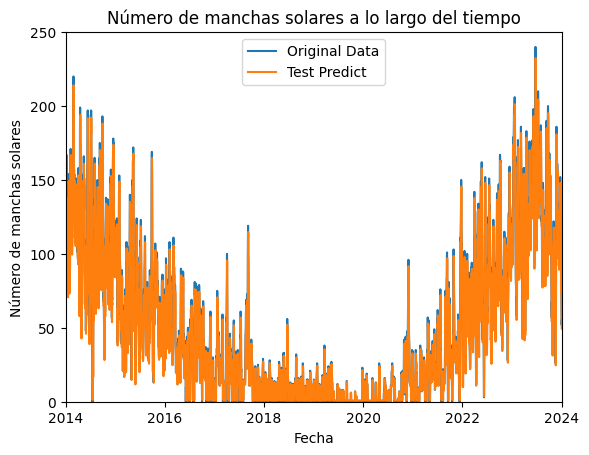

In [99]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(daily_df['DecimalYear'], daily_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()
plt.show()

#### **Utilizando una red neuronal con 50 neuronas y con 10 momentos atrás**

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_27 (SimpleRNN)       │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - loss: 0.0034
Epoch 2/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - loss: 0.0019
Epoch 3/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 741us/step - loss: 0.0020
Epoch 4/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - loss: 0.0019
Epoch 5/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - loss: 0.0020
Epoch 6/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 778us/step - loss: 0.0019
Epoch 7/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - loss: 0.0019
Epoch 8/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step - loss: 0.0019
Epoch 9/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - loss: 0.0019
Epoch 10/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - loss: 0.0019
Epoch 11/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - loss: 0.0019
Epoch 12/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step - loss: 0.0019
Epoch 13/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step - loss: 0.0019
Epoch 14/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - loss: 0.0019
E

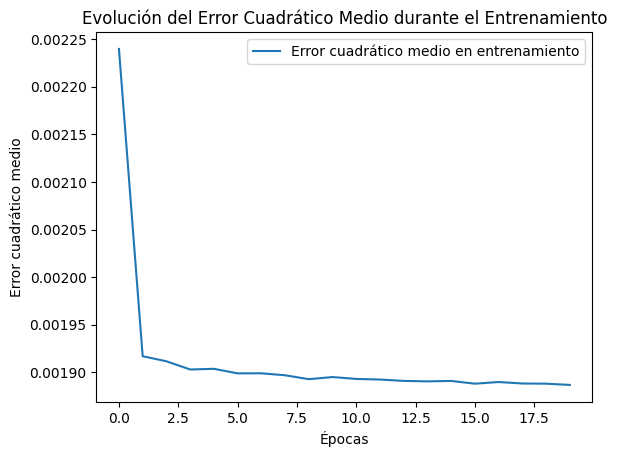

In [100]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 6.5371e-04
Pérdida: 0.0005754619487561285
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


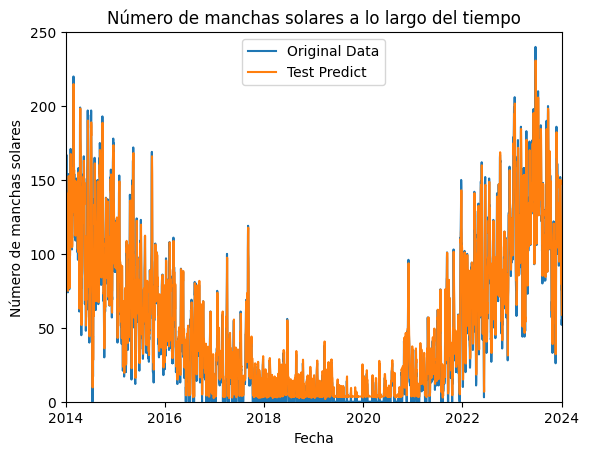

In [101]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(daily_df['DecimalYear'], daily_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()

Se puede apreciar que en los 3 casos la red se comporta de forma similar, siendo la única diferencia las épocas que les toman alcanzar el error de 0.05%

## **Probando con la curva mensual suave**

Con el fin de ver si el error se reduce, probaremos como se comporta al utilizar la curva suavizada de las manchas solares mensuales

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_31 (SimpleRNN)       │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.2402
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0415
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0198
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0022
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.0013
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0011
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 9.9639e-04
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 9.0728e-04
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 8.1767e-04
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 7.9360e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 7.4822e-04
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 7.0072e-04
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 6.5395e-04
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 5.4106e-04
Epoch 15/20
99/99 ━━━━━━━

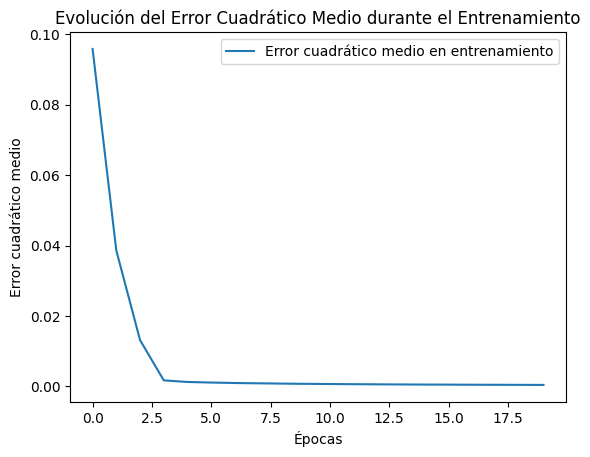

In [110]:
from keras.api.layers import SimpleRNN, Dense
from keras.src.models import Sequential

# Dividir los datos en conjunto de entrenamiento y prueba
train_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] < 2014]
test_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = (10, 1)

model = Sequential()
model.add(SimpleRNN(1, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

#### **Probando la red neuronal**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1649e-04
Pérdida: 0.00020556547679007053
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


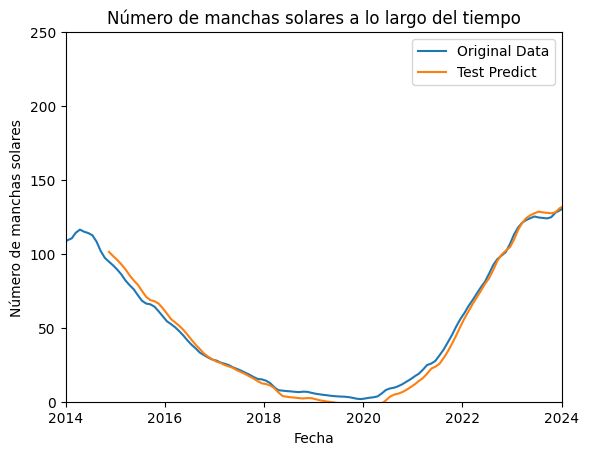

In [111]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(monthly_smoothed_df['DecimalYear'], monthly_smoothed_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()

Podemos ver que a pesar de que la curva es más suave, las predicciones son menos precisas, esto se puede deber a que poseemos menos datos para el entrenamiento.

## **Creando una red neuronal recurrente con neuronas LSTM de Keras.**

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0080
Epoch 2/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - loss: 0.0033
Epoch 3/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - loss: 0.0029
Epoch 4/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - loss: 0.0026
Epoch 5/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 0.0024
Epoch 6/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - loss: 0.0022
Epoch 7/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - loss: 0.0022
Epoch 8/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - loss: 0.0021
Epoch 9/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - loss: 0.0020
Epoch 10/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - loss: 0.0020
Epoch 11/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - loss: 0.0020
Epoch 12/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - loss: 0.0019
Epoch 13/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - loss: 0.0019
Epoch 14/20
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - loss: 0.0019
Epo

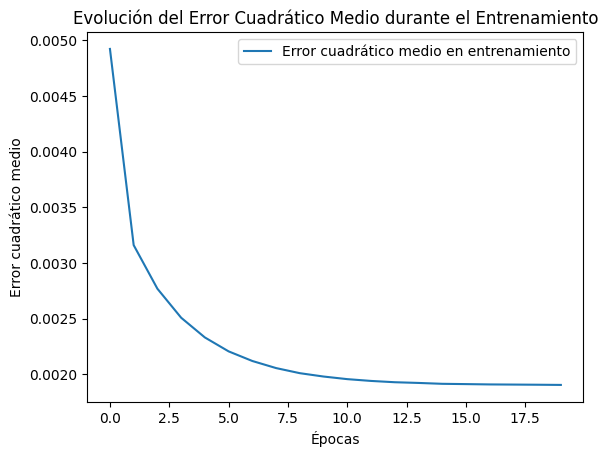

In [113]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_df = daily_df[daily_df['DecimalYear'] < 2014]
test_df = daily_df[daily_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = (10, 1)

model = Sequential()
model.add(LSTM(1, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

#### **Probando la red neuronal:**

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 6.7332e-04
Pérdida: 0.0005881235701963305
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


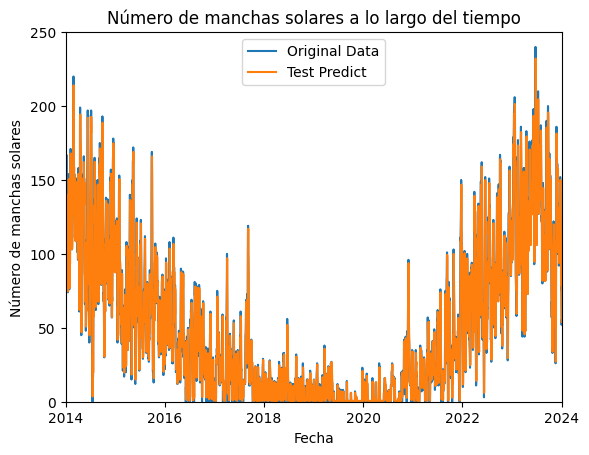

In [114]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(daily_df['DecimalYear'], daily_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()

Para la data diaria podemos ver que los resultados de la red son similares a los de la red recurrente simple

#### **Probando con la data mensual suavizada**

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1346
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0271
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0047
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0016
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.0015
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.0014
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0014
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0013
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0013
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.0013
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0013
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.0012
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.

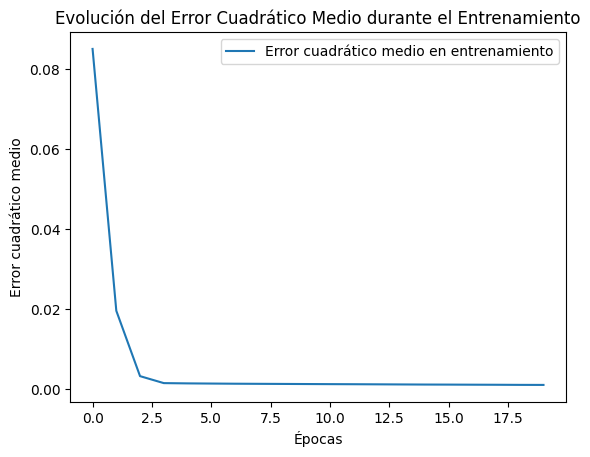

In [116]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] < 2014]
test_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = (10, 1)

model = Sequential()
model.add(LSTM(1, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

#### **Probando la red**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7454e-04  
Pérdida: 0.0006319493986666203
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


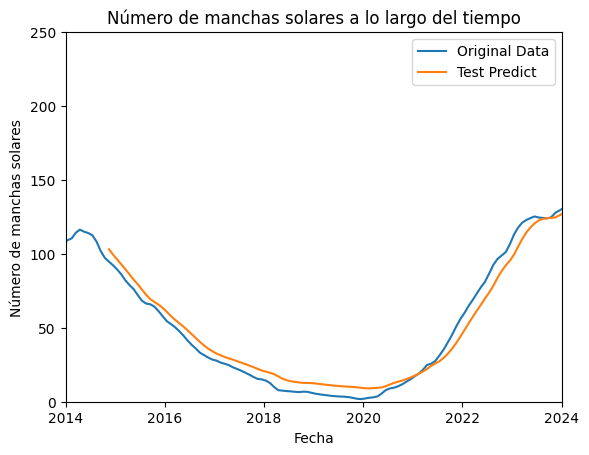

In [117]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(monthly_smoothed_df['DecimalYear'], monthly_smoothed_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()

Podemos ver que en este caso, mejoró significativamente el error, pasando de 0.18% con la red neuronal recurrente a 0.07% con una red LSTM de una neurona

## **Probando con más neuronas en la red LSTM**

Probando con una red LSTM de 10 neuronas

c:\Users\LAGD\Documents\UCAB\10mo Semestre\IA\Practicas\Practica 3-evaluada\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 200)            │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1202
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010   
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7039e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7360e-04
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1266e-04
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5527e-04
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3442e-04
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

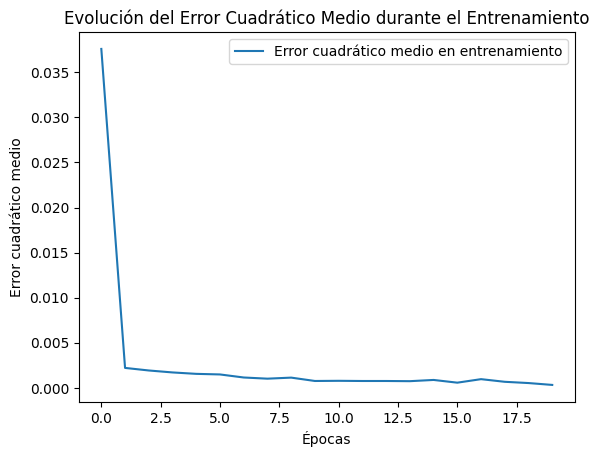

In [125]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] < 2014]
test_df = monthly_smoothed_df[monthly_smoothed_df['DecimalYear'] >= 2014]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['DecimalYear', 'SN']])
test_scaled = scaler.transform(test_df[['DecimalYear', 'SN']])

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = (10, 1)

model = Sequential()
model.add(LSTM(200, input_shape=input_shape))
model.add(Dense(1))

optimizer = SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=20, verbose=1)

# Graficamos el error cuadrático medio para cada época
plt.plot(history.history['loss'], label='Error cuadrático medio en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del Error Cuadrático Medio durante el Entrenamiento')
plt.legend()
plt.show()

#### **Probando la red con 10 neuronas**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2147e-04  
Pérdida: 0.00017870761803351343
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


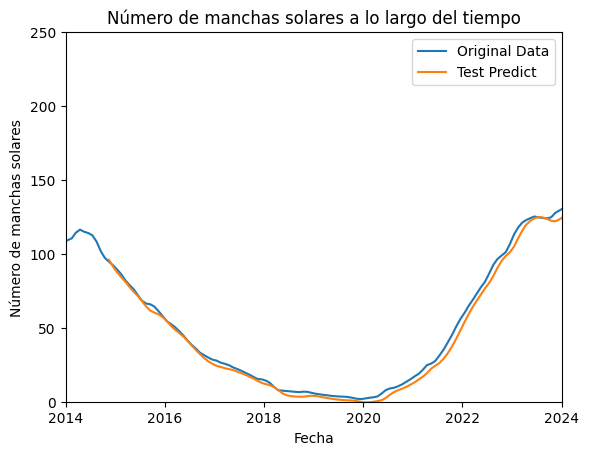

In [126]:
loss = model.evaluate(X_test, y_test)
print("Pérdida:", loss)

test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], test_predict), axis=1))[:, 1]

plt.plot(monthly_smoothed_df['DecimalYear'], monthly_smoothed_df['SN'], label='Original Data')
plt.plot(test_df['DecimalYear'][time_step:], test_predict, label='Test Predict')

plt.xlim(2014, 2024)
plt.ylim(0,250)

# Mostrar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.title('Número de manchas solares a lo largo del tiempo')
plt.legend()

Con respecto a la red neuronal LSTM con 1 neurona, podemos ver que el error disminuyó de 0.03% a un 0.018% en la data de validación

## **4. Que puede decir de los hiperparámetros en los casos anteriores.**

> En terminos generales, a mayor cantidad de neuronas mejor es la precisión de la red

> En cuanto a las épocas, dependiendo de los demás hiperparámetros, hacen falta menos (épocas) para alcanzar el menor error

> Al utilizar Descenso de Gradiente Estocástico (SGD) el learning rate que más nos ha funcionado es 0.5